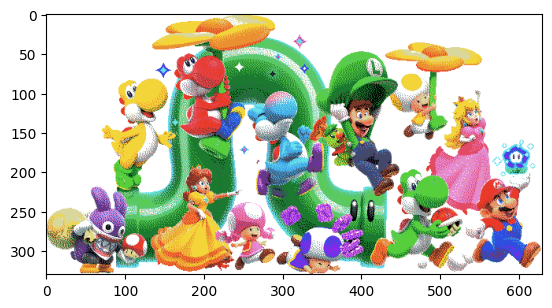

In [97]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open("20col.png")
plt.imshow(img)
a = np.array(img)
h, w, c = a.shape

## Compress via K-Means clustering
Each pixel is a vector in `[0, 255]x[0, 255]x[0, 255]`. Cluster these vectors using k-means and assign to each point the centroid as compressed color.

Unique colors found in img: 20


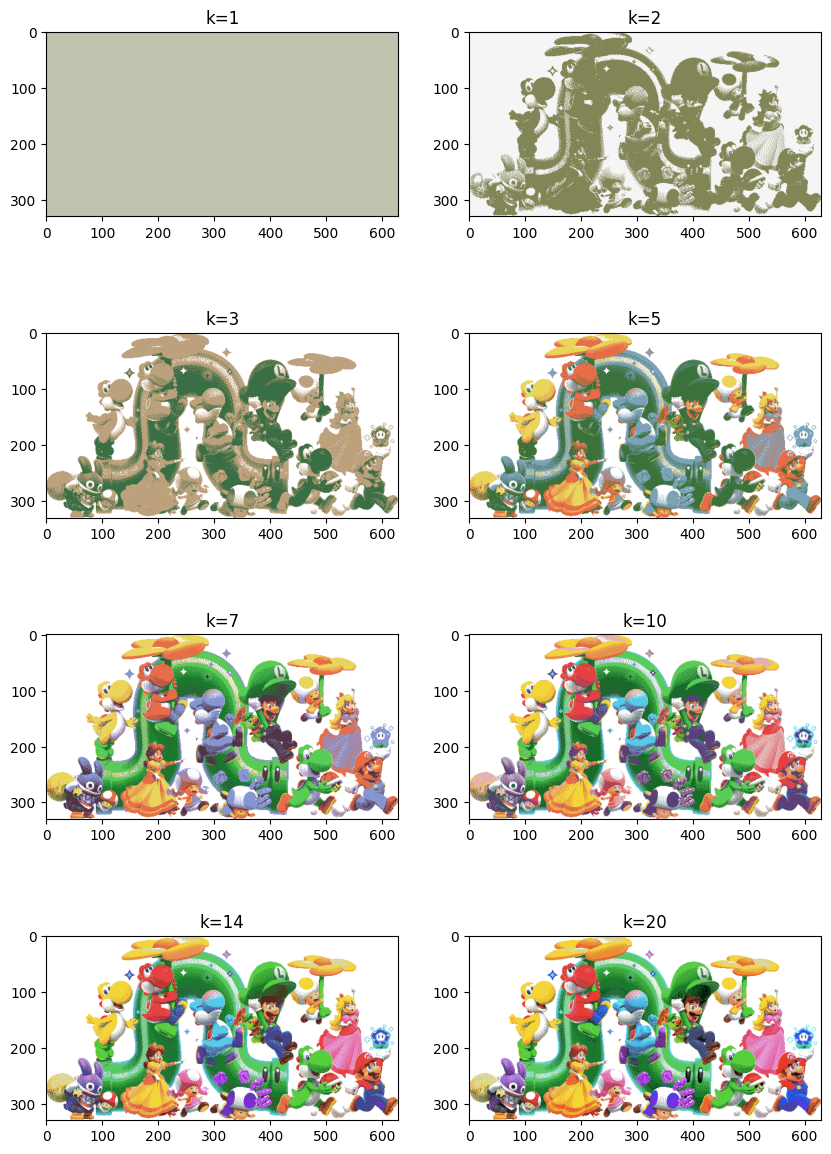

In [154]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Flatten the image
X = a.reshape(h*w, c)
n_colors = np.unique(X, axis=0).shape[0]
print(f'Unique colors found in img: {n_colors}')

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10, 15))
ks = np.unique(np.logspace(0, np.log10(n_colors), num=10, dtype = int))
for i in range(len(ks)):
    k = ks[i]
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)  # Adjust 'n_clusters' as needed
    kmeans.fit(X_scaled)

    # Replace each pixel by its centroid
    X_compressed = kmeans.cluster_centers_[kmeans.labels_]

    # Convert back to RGB
    img_compressed = scaler.inverse_transform(X_compressed).reshape(h, w, c).astype(np.uint8)
    plt.subplot(len(ks)//2, 2, i+1)
    plt.title(f'k={k}')
    plt.imshow(img_compressed)
plt.show()